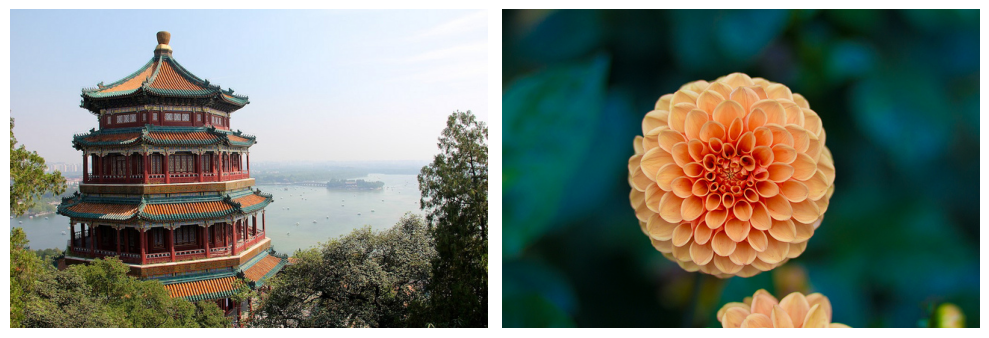

In [1]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
np.random.seed(SEED)

dataset = load_sample_images()

fig, axarr = plt.subplots(1, len(dataset.images), figsize=(10, 5))
for ax, img in zip(axarr, dataset.images):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

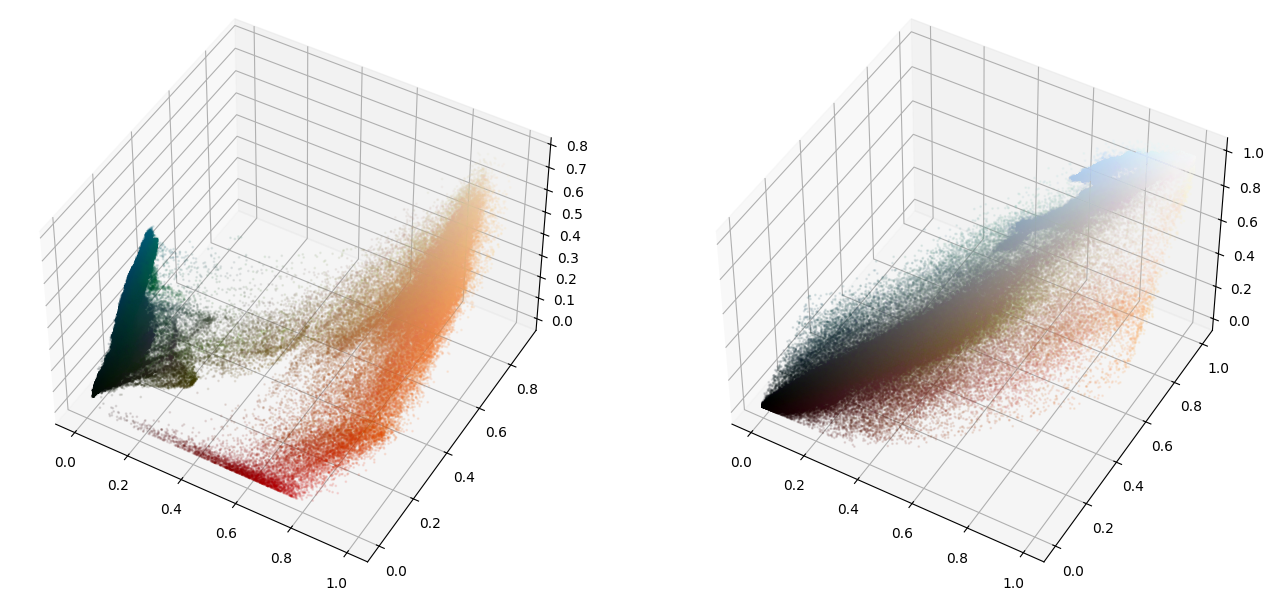

In [2]:
import numpy as np

def plot_rgb(img, fig, pos):
    ax = fig.add_subplot(pos, projection='3d')
    img = img.reshape(-1, 3).astype(np.float32) / 255.0
    ax.scatter(*img.T, c=img, s=1, alpha=0.1)
    ax.view_init(elev=45, azim=-60)

fig = plt.figure(figsize=(16, 8))
plot_rgb(dataset.images[0], fig, 122)
plot_rgb(dataset.images[1], fig, 121)

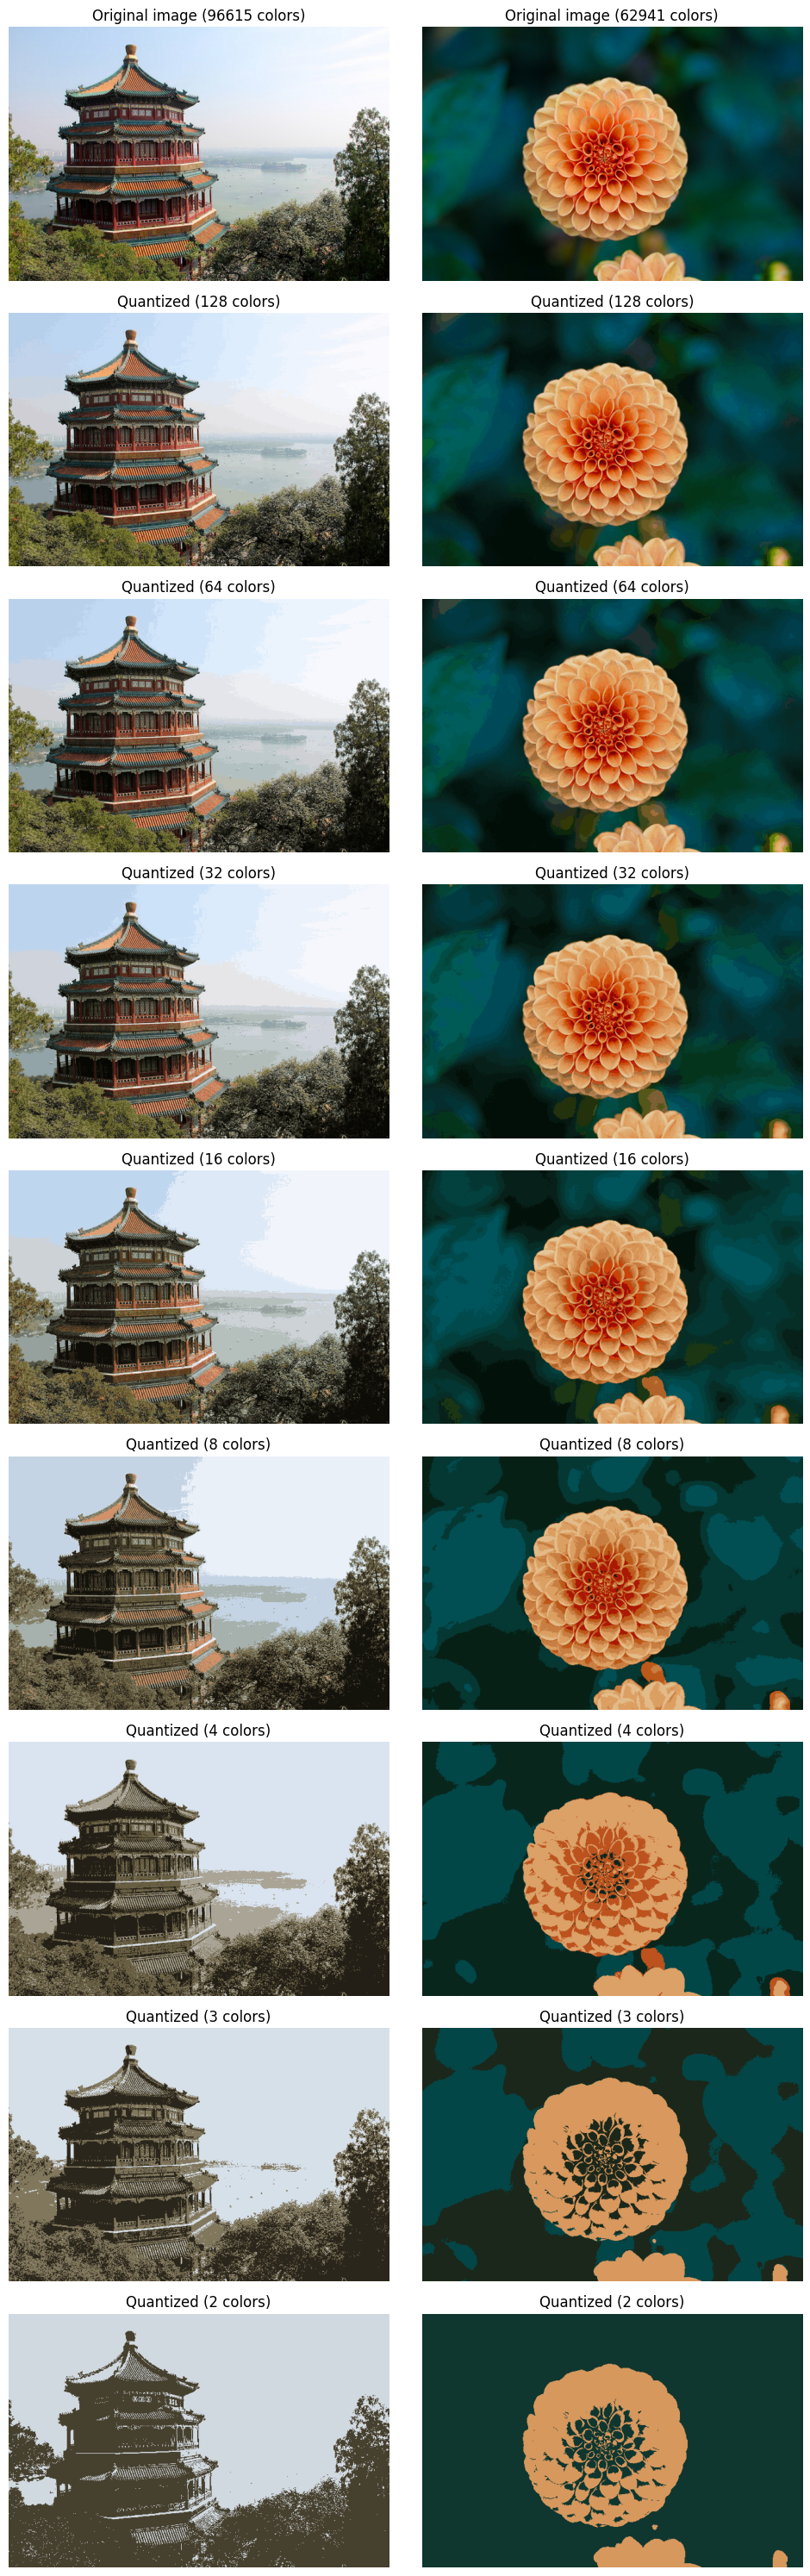

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def quantize_colors(img, k: int):
    x = img.reshape(-1, 3)
    scaler = StandardScaler().fit(x)
    x = scaler.transform(x)
    
    clustering = KMeans(k, random_state=SEED).fit(x)
    y = clustering.predict(x)

    q = clustering.cluster_centers_[y]
    q = scaler.inverse_transform(q)
    q = q.reshape(img.shape)
    return q

ks = [128, 64, 32, 16, 8, 4, 3, 2]
fig, axarr = plt.subplots(len(ks) + 1, len(dataset.images), figsize=(10, 30))

for img, ax in zip(dataset.images, axarr[:1].ravel()):
    ax.imshow(img)
    n_colors = len(np.unique(img.reshape(-1, 3), axis=0))
    ax.set_title(f"Original image ({n_colors} colors)")
    ax.axis('off')

for k, axes in zip(ks, axarr[1:]):
    for img, ax in zip(dataset.images, axes):
        img = img.astype(np.float32) / 255.0
        ax.imshow(quantize_colors(img, k=k))
        ax.set_title(f"Quantized ({k} colors)")
        ax.axis('off')

fig.tight_layout()
fig.savefig('results.png', dpi=300)